#Overview:
In this project we have a customer dataset where we analyze retention and churning of customers ,and possible reasons for them not returning compared to those that did not leave the business.We do this through Explortory Data Analysis and visualizations in python to gain these insights

1#Importing Libraries
Tools:Using Pandas to import data,matplotlib and seaborn for data visualizations


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2#Loading the dataset into pandas datafrme:Telco-Customer-Churn ,the dataset source was from kaggle where Each row represents a customer, with each column containing the customers’ attributes

In [13]:
df=pd.read_csv('Telco-Customer-Churn.csv')
print(df.head(7))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


3#I did a overview of the dataset getting the information such as row numbers and the number of coloumns(shape), number of of null values on each coloumn,and the datatypes of each coloumn

In [62]:
#infomation on the dataset
print('Data Set Information\n')
print('Number Of Rows:',df.shape[0])
print('Number Of Coloumns:',df.shape[1])
print()
print('NullCount in each col:','\n',df.isnull().sum())
print()
print('Data types:\n',df.dtypes)


Data Set Information

Number Of Rows: 7043
Number Of Coloumns: 21

NullCount in each col: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object

In [68]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


4#Doing Data Analysis in Context Of the Data and Making Visualizations

-Getting the amount of customers the company could not retain compared to how many were retained

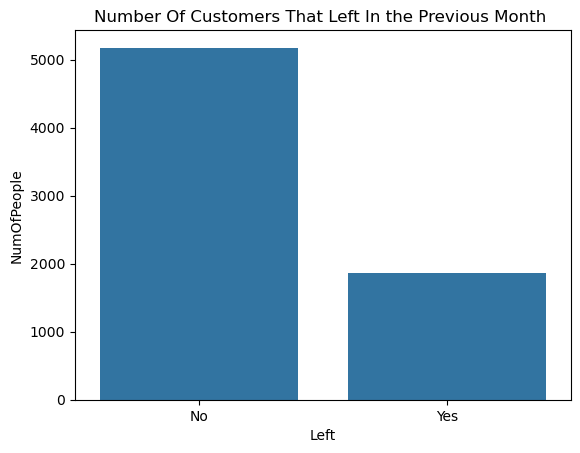

       NumOfPeople
Churn             
No            5174
Yes           1869



In [120]:

dfChurn=df.groupby('Churn').agg({'customerID':'count'}).rename(columns={'customerID':'NumOfPeople'})

sns.barplot(data=dfChurn,y='NumOfPeople',x='Churn')
plt.title('Number Of Customers That Left In the Previous Month ')
plt.xlabel('Left')
plt.show()
print(dfChurn)
print()

-looking at how the type of contract affect customers ,whether they leave or the business retains them based on their type of contract

In [176]:

dfContracts=df.groupby(['Churn','Contract']).agg({'customerID':'count'}).rename(columns={'customerID':'NumberOfIndividuals'})
print(dfContracts)
print()

                      NumberOfIndividuals
Churn Contract                           
No    Month-to-month                 2220
      One year                       1307
      Two year                       1647
Yes   Month-to-month                 1655
      One year                        166
      Two year                         48



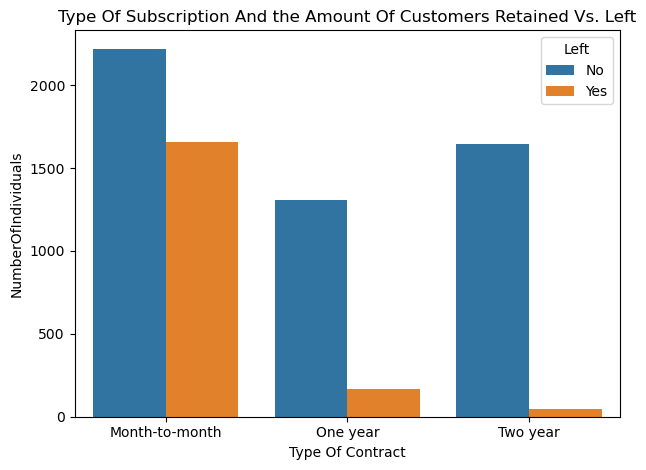

In [190]:
sns.barplot(data=dfContracts, x='Contract', y='NumberOfIndividuals',hue='Churn')
plt.title('Type Of Subscription And the Amount Of Customers Retained Vs. Left')
plt.xlabel('Type Of Contract')
plt.legend(title='Left')
plt.tight_layout()
plt.show()

In [ ]:
#insight->many customers with the month-to-monh subscription left,more with a longer subcription were retained, thus is better to promote year long subscription...?

In [192]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


-trying to understand how pricing affects customer retention and churning
-getting the average prices for the people that left and the people that stayed(month-to-month since most people leaving are in the mTm bracket,this also prevents outliers)


In [246]:

#Changing Data Type first
#float->TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

dfMonthly=df[df['Contract']=='Month-to-month']

dfAvgCharges=dfMonthly.groupby('Churn').agg({'TotalCharges':'mean','MonthlyCharges':'mean'}).round(2).rename(columns={'TotalCharges':'AvergeTotalCharges','MonthlyCharges':'AverageMonthlyCharges'})
print(dfAvgCharges)

       AvergeTotalCharges  AverageMonthlyCharges
Churn                                           
No                1521.93                  61.46
Yes               1164.46                  73.02


#plotting the effect of charges

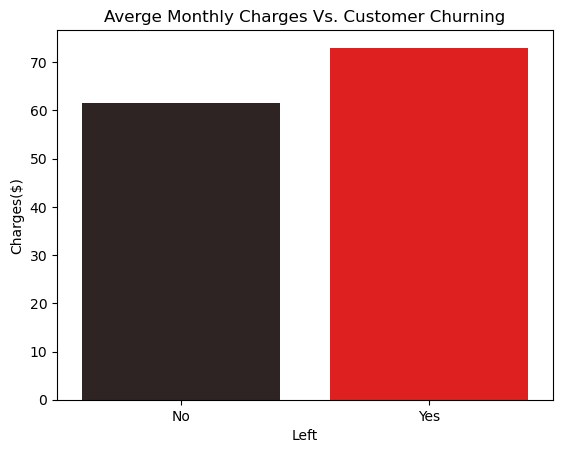

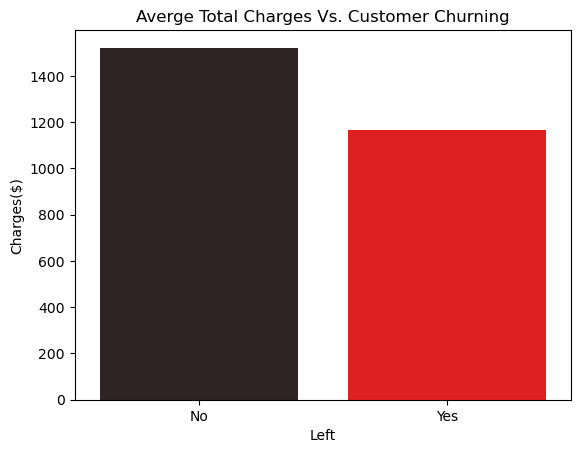

In [284]:

sns.barplot(data=dfAvgCharges,x='Churn',y='AverageMonthlyCharges',color='red',hue='Churn',palette='dark:red')
plt.title('Averge Monthly Charges Vs. Customer Churning')
plt.xlabel('Left')
plt.ylabel('Charges($)')
plt.show()

sns.barplot(data=dfAvgCharges,x='Churn',y='AvergeTotalCharges',color='red',hue='Churn',palette='dark:red')
plt.title('Averge Total Charges Vs. Customer Churning')
plt.xlabel('Left')
plt.ylabel('Charges($)')
plt.show()



-seeing which payment method most people are using

In [298]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


               PaymentMethod Churn  NumOfPeople
0  Bank transfer (automatic)    No         1286
1  Bank transfer (automatic)   Yes          258
2    Credit card (automatic)    No         1290
3    Credit card (automatic)   Yes          232
4           Electronic check    No         1294
5           Electronic check   Yes         1071
6               Mailed check    No         1304
7               Mailed check   Yes          308


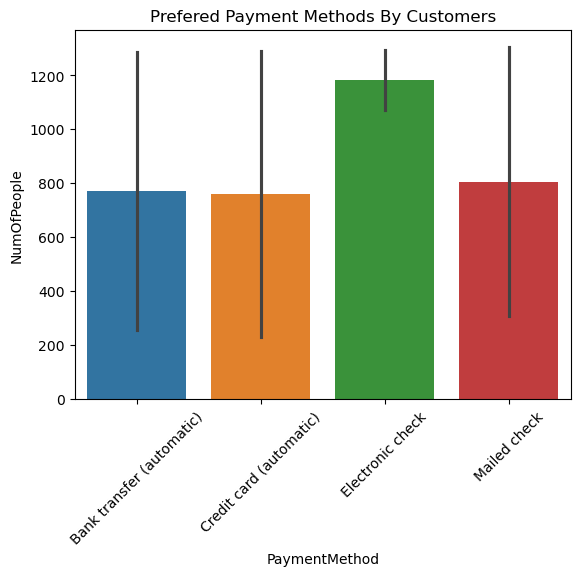

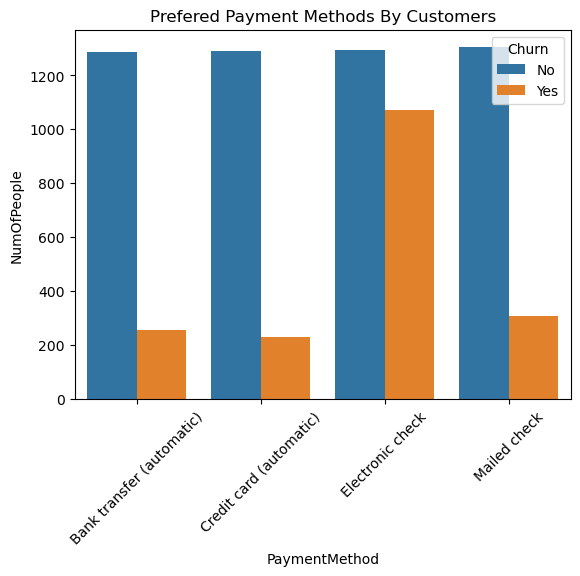

In [324]:
dfPayment=df.groupby(['PaymentMethod','Churn'],as_index=False).agg({'customerID':'count'}).rename(columns={"customerID":'NumOfPeople'})
print(dfPayment)
sns.barplot(data=dfPayment,x='PaymentMethod',y='NumOfPeople',hue='PaymentMethod')
plt.title('Prefered Payment Methods By Customers')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data=dfPayment,x='PaymentMethod',y='NumOfPeople',hue='Churn')
plt.title('Prefered Payment Methods By Customers')
plt.xticks(rotation=45)
plt.show()

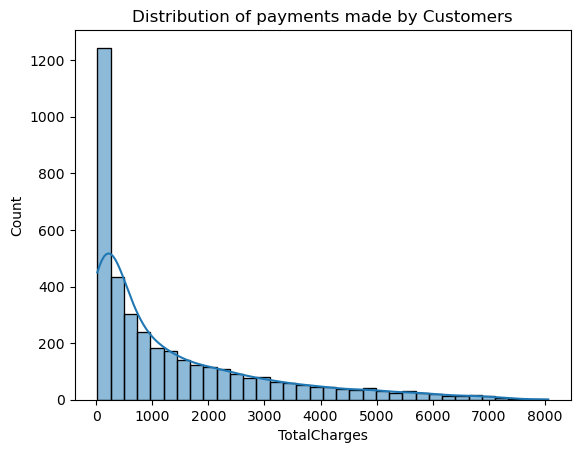

In [336]:
dfMonth=df[(df['Contract']=='Month-to-month')]
sns.histplot(data=dfMonth,x='TotalCharges',kde=True)
plt.title('Distribution of payments made by Customers')
plt.show()

5#Making Insights and Understanding the data
#insight->many customers with the month-to-monh subscription left,more with a longer subcription were retained, therforefore is it better to promote year long subscription...?
#insight->AverageMonthlyCharges were higher for the custumers that left than those who remained
#insight->Other insights we saw how people mostly prefer to use Electronic payments than the rest (both curned and retained customers)
#insight->Using a histogram and looking atth distribution of payments made by use on month to month contracts,the distibution was skewed to the right,showing that many user might prefer lower prices